<a href="https://colab.research.google.com/github/simodepth/Market-Trends-Research/blob/main/%F0%9F%94%81_SERP_Scraping_w_PyTrends_and_Serp_Api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Analysis and Keyword Research Kick-Off


---


This Python model is designed to provide a method start off a preliminary market-oriented analysis to ultimately furnish marketers general tools to dig deep in keyword research.

From a comprehensive trends overview for selected entities, Python libraries with gears of **Pytrends**, **Pandas** and **Serp Api** will guide users across the slippery requirements of serious keyword research settings. 

The goal of this module is, in fact, to provide users with free machine learning tools to kickstart in-depth entity and keyword research. 




#Prepare environment
Colab: Enable the GPU runtime

Make sure you enable the GPU runtime to experience decent speed in this tutorial.

**Runtime -> Change Runtime type -> Hardware accelerator -> GPU**

<img src="https://raw.githubusercontent.com/deepset-ai/haystack/main/docs/img/colab_gpu_runtime.jpg">

In [ ]:
!pip install google-search-results
!pip install pytrends
!pip install fake-useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for google-search-results: filename=google_search_results-2.4.1-py3-none-any.whl size=25789 sha256=1e8a355c4c23817a2f28065295f876e847d3f6e803795d4db0cf7b4be1922a5d
  Stored in directory: /root/.cache/pip/wheels/82/a3/c5/364155118f298722dff2f79ae4dd7c91e92b433ad36d6f7e0e
Successfully built google-search-results
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=936c2174ff6b869c889e703aa9a96121448057c27c8e03054d2caa11e48d1f99
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl si

In [ ]:
import requests
import pandas as pd
import json
from serpapi import GoogleSearch
import urllib.parse
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Use Pytrends to find Interest Over Time for a set of Entities (UK) 

In [ ]:
#import the libraries

from pytrends.request import TrendReq
import pandas as pd
import time
startTime = time.time()
pytrends = TrendReq(hl='en-GB', tz=360, timeout=(10,25))

#import the keywords file

colnames = ["keywords"]
df = pd.read_excel("/content/keywords.xlsx", names=colnames)
df2 = df["keywords"].values.tolist()

#set up the dataframe and loop for pytrends

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrends.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2022-01-01 2022-09-01',
     geo='GB')
     data = pytrends.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))

#merge the results

result = pd.concat(dataset, axis=1)
result.head()




Execution time in sec.: 3.619384288787842


,coffee,tea,juice,milkshake,frappuccino,cappuccino
date,,,,,,
2022-01-01,91,67,72,69,21,68
2022-01-02,96,81,71,69,13,64
2022-01-03,92,77,79,57,16,51
2022-01-04,82,73,79,58,0,66
2022-01-05,78,67,71,45,0,73


In [ ]:
#@title Download Full Results
result.to_csv('search_trends.csv')

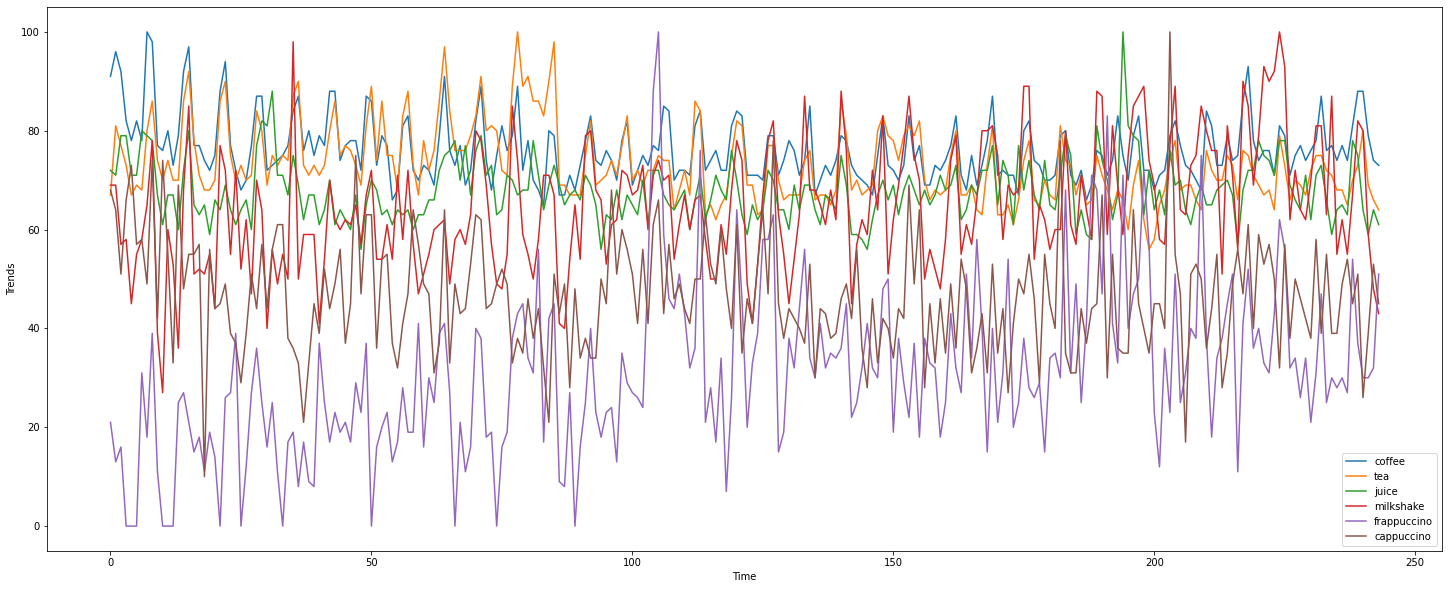

In [ ]:
#@title Visualize Trends
df = pd.read_csv(r'/content/search_trends.csv')  #@param {type: "string"}
df.plot(xlabel="Time", ylabel="Trends",figsize=(25,10))

#Fetch the Entity Suggestions from the Top Trending Keyword


---
Given that "Coffee" leads the trending topics among the beverage sector in the UK in the last 8 months, we can start to investigate further about the spectrum of the existing entity comnections

For this reason, we are going to expand now on:
- Primary Related Entities from Google Autosuggest
- Secondary Related Entities (or Related Queries) from Google's Related Search   


In [ ]:
#@title Related Entities from Google Autcomplete
keywords = pytrends.suggestions('coffee')
df = pd.DataFrame(keywords)
cols = ['mid', 'Entity', 'Meaning']
df.columns = cols
df=df.drop("mid",axis=1)
df


,Entity,Meaning
0,Coffee,Drink
1,Coffeemaker,Topic
2,Starbucks,Coffeehouse company
3,Coffee bean,Topic
4,Coffee,Plant


The names I attributed to this data frame's columns are not casual.

"Coffee" is a physical and tangible sign, which embed a wider span of meanings depending on cultural values as well as psychographic features of a given civilization. However, from a semiotic standpoint the main meaning of "Coffee" sits primarily with the one of a "Drink" as it's possibly the very first association that comes to mind to pretty much all of use - hopefully.

In poor semiotic terms, **an Entity is a sign that depends on a spectrum of inner meanings and relate to a hundred others**


In [ ]:
#@title Related Queries

#import the libraries
from google.colab import files

#get related queries
related_queries = pytrends.related_queries()
related_queries.values()

#build lists dataframes

top = list(related_queries.values())[0]['top']
rising = list(related_queries.values())[0]['rising']

#convert lists to dataframes

dftop = pd.DataFrame(top)
dfrising = pd.DataFrame(rising)

#join two data frames
joindfs = [dftop, dfrising]
allqueries = pd.concat(joindfs, axis=1)

#function to change duplicates

cols=pd.Series(allqueries.columns)
for dup in allqueries.columns[allqueries.columns.duplicated(keep=False)]: 
    cols[allqueries.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(allqueries.columns.get_loc(dup).sum())]
                                    )
allqueries.columns=cols

#rename to proper names

allqueries.rename({'query': 'top query', 'value': 'top query value', 'query.1': 'related query', 'value.1': 'related query value'}, axis=1, inplace=True) 
allqueries = allqueries.dropna() #drop rows containing NaN

#check your dataset
allqueries.head(50)

,top query,top query value,related query,related query value
0,latte,100,nut cappuccino my cafe,21400.0
1,coffee,100,chocolate sprinkles for cappuccino,17450.0
2,cappuccino coffee,99,frank cappuccino,11750.0
3,cappuccino calories,64,black coffee calories,10950.0
4,delonghi cappuccino,37,thorntons cappuccino chocolates,10750.0
5,cappuccino machine,37,aroma hot chocolate my cafe,8200.0
6,delonghi,37,what is an americano coffee,4300.0
7,costa,34,cappuccino marbella,200.0
8,costa cappuccino,34,costa cappuccino pods,190.0
9,what is cappuccino,34,cappuccino lip liner,120.0


In [ ]:
#@title Download Related Queries
#save to csv
allqueries.to_csv('allqueries.csv')
#download from colab
files.download("allqueries.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Kicking-Off a Keyword Research with the right Tools


---

Now that we learned about "Coffee" and its entity network, it's time to narrow down the target of the analysis. 

For this purpose, we are going to use the **Serp Api key** to trawl through the Coffe verticals in a bid to pick up low-hanging fruit and insigthful data that hardly a paid SEO tool would be able to retrieve.


Let’s set up some variables for the SERPapi call. See their full API documentation for many additional parameters should you need them.

- query: this is the query you want to search for
- location: the country you want to communicate the search is coming from
- lang: the language the query search is in
- country: similar to location, you usually want these to align
- result_num: how many results you want to be returned. 8 usually is the first page, 16 is two pages, etc, etc
- google_domain: the country-specific domain you want to search from (ex. google.com or google.fr). This usually aligns with some of the parameters above.

In [ ]:
#@title SERP Audit with Google Search Api

from serpapi import GoogleSearch

serp_apikey = "fbb0564d15451bc375ec75f75bab1db3ae1a4775682e6c07ec8c685099506cb0" #@param {type:"boolean"}

params = {
    "engine": "google",
    "q": "is coffee good for hangover?",
    "location": "United Kingdom",
    "google_domain": "google.com",
    "gl": "uk",
    "hl": "en",
    "num": 10,
    "api_key": serp_apikey
}

client = GoogleSearch(params)
data = client.get_dict()

# access "organic results"
df = pd.DataFrame(data['organic_results'])
cols = ['Position', 'Title Link','URL','Displayed Link', 'Date','Snippet','Highlighted Words','About this Result', 'About page link','Cached Page Link','Related Pages']
df.columns = cols

df

https://serpapi.com/search


,Position,Title Link,URL,Displayed Link,Date,Snippet,Highlighted Words,About this Result,About page link,Cached Page Link,Related Pages
0,1,Is Coffee Good for a Hangover? – Cleveland Clinic,https://health.clevelandclinic.org/does-coffee...,https://health.clevelandclinic.org › does-coff...,8 Mar 2022,The caffeine in coffee might not be kind to yo...,[The caffeine in coffee might not be kind to y...,{'source': {'description': 'Cleveland Clinic i...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
1,2,10 hangover remedies: What works? - CNN.com,http://www.cnn.com/2010/HEALTH/12/30/hangover....,http://www.cnn.com › HEALTH › hangover.remedies,31 Dec 2010,"That said, caffeine narrows your blood vessels...",[caffeine narrows your blood vessels and boost...,{'source': {'description': 'The Cable News Net...,https://www.google.com/search?q=About+http://w...,http://webcache.googleusercontent.com/search?q...,NaN
2,3,Should You Drink Coffee To Cure A Hangover?,https://driftaway.coffee/should-you-drink-coff...,https://driftaway.coffee › should-you-drink-co...,NaN,Coffee has long been a go-to for curing hangov...,[there's little evidence that it actually does...,{'source': {'description': 'driftaway.coffee w...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,https://www.google.com/search?gl=uk&hl=en&q=re...
3,4,Can Coffee Cure Hangovers? What You Need to Know!,https://coffeeaffection.com/coffee-for-curing-...,https://coffeeaffection.com › coffee-for-curin...,30 Aug 2022,At least one study has shown that caffeine pai...,[shown that caffeine paired with an anti-infla...,{'source': {'description': 'coffeeaffection.co...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
4,5,Will Coffee Cure A Hangover Or Just Make It Wo...,https://sprudge.com/will-coffee-cure-a-hangove...,https://sprudge.com › will-coffee-cure-a-hango...,13 May 2021,"Also there is a cure, and it's fool proof. It ...","[Also there is a cure, and it's]",{'source': {'description': 'Sprudge is an Amer...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
5,6,"The five most popular hangover cures, rated by...",https://qz.com/quartzy/1401348/the-five-most-p...,https://qz.com › quartzy › the-five-most-popul...,29 Sept 2018,Evidence suggests that people who regularly dr...,[people who regularly drink caffeine develop a...,{'source': {'description': 'qz.com was first i...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
6,7,"Coffee IS the best hangover cure, scientists s...",https://www.thesun.co.uk/tech/15350708/coffee-...,https://www.thesun.co.uk › tech › coffee-best-...,22 Jun 2021,SCIENTISTS have now woken up and smelled the c...,[be the perfect hangover cure],{'source': {'description': 'The Sun is a Briti...,https://www.google.com/search?q=About+https://...,NaN,NaN
7,8,Can Coffee Really Cure a Hangover? - The Roast...,https://theroasterie.com/blogs/news/can-coffee...,https://theroasterie.com › blogs › news › can-...,24 Oct 2012,"Does coffee help hangovers? ... Yes, coffee ca...","[Yes, coffee can help a hangover]",{'source': {'description': 'theroasterie.com w...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN


In [ ]:
# index=false to drop default pandas row numbers
df.to_csv(f"organic-results-{params['q']}-data.csv", index=False)

In [ ]:
organic_df = pd.read_csv = (r'/content/organic-results-is coffee good for hangover?-data.csv')
organic_df["Highlighted Words"] = organic_df["Highlighted Words"].str.replace("^\['|'\]$","")
organic_df

TypeError: ignored